In [25]:
import os
from skimage import io

import matplotlib.pyplot as plt

import numpy as np

from scipy.ndimage import binary_erosion, binary_dilation

In [2]:
path = '/cluster/work/sis/cdss/oschmanf/ackermann-bacteria-segmentation/data/unet/family_machine/'
cell_types = os.listdir(path)
print(cell_types)

['E_coli_Olga', 'CB15-flgH', 'Phase', 'E_coli', 'CB15-WT', 'FS144', 'ZF270g']


# FS144

In [42]:
img = io.imread('../data/unet/family_machine/FS144/orig_img/img/GD_04092019AlgCo_Cas_Pos57_TXRED_Exp001_frame100_cut.png')
seg = io.imread('../data/unet/family_machine/FS144/orig_img/mask/GD_04092019AlgCo_Cas_Pos57_TXRED_Exp001_frame100_seg3_bin.png')

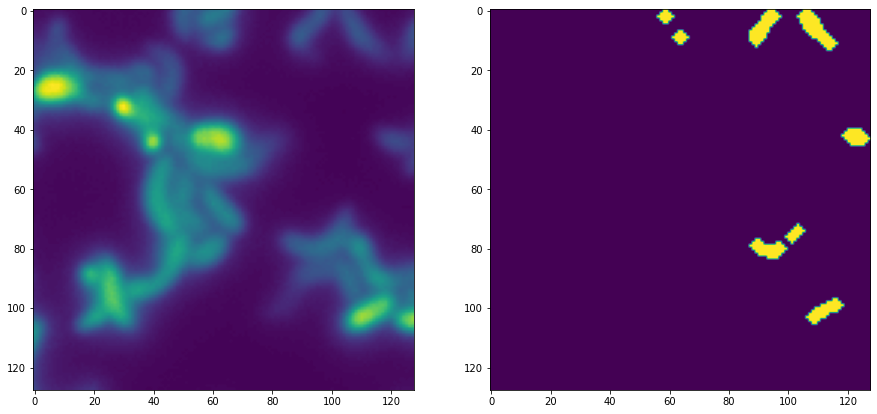

In [56]:
plt.figure(figsize=(15,15))

y_rand = np.random.randint(0,img.shape[0])
x_rand = np.random.randint(0,img.shape[1])

plt.subplot(1,2,1)
plt.imshow(img[y_rand:(y_rand+128), x_rand:(x_rand+128)])

plt.subplot(1,2,2)
plt.imshow(proc(seg[y_rand:(y_rand+128), x_rand:(x_rand+128)]))

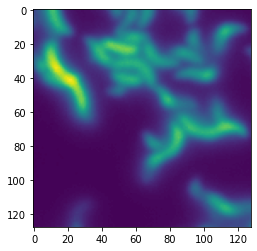

In [53]:
plt.imshow(seg[y_rand:(y_rand+128), x_rand:(x_rand+128)] + img[y_rand:(y_rand+128), x_rand:(x_rand+128)])

In [3]:
path_fs144 = path + 'FS144/train/training_data_FS144_1.npz'
data_fs144 = np.load(path_fs144)

In [4]:
X_train_fs144 = data_fs144['X_train']
y_train_fs144 = data_fs144['y_train']
weight_maps_train_fs144 = data_fs144['weight_maps_train']

In [38]:
def proc(x):
    x_proc = binary_dilation(binary_dilation(binary_erosion(binary_erosion(x))))
    return x_proc

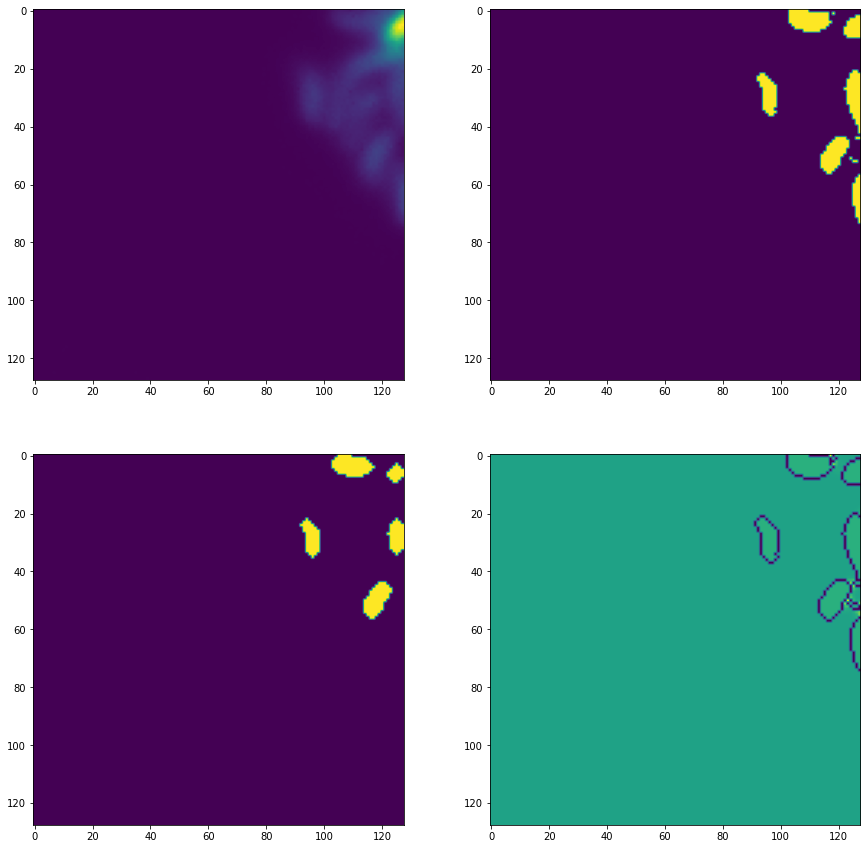

In [39]:
ix = 2390

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(X_train_fs144[ix,:,:,0])

plt.subplot(2,2,2)
plt.imshow(y_train_fs144[ix,:,:,0])

plt.subplot(2,2,3)
plt.imshow(proc(y_train_fs144[ix,:,:,0]))

plt.subplot(2,2,4)
plt.imshow(weight_maps_train_fs144[ix,:,:,0])

# CB15-WT

In [24]:
img_name = path + 'CB15-WT/train/img/Caulobacter_WT-Raw.tif'
seg_name = path + 'CB15-WT/train/mask/Caulobacter_WT_segmented.tif'

In [25]:
img = io.imread(img_name)
seg = io.imread(seg_name)

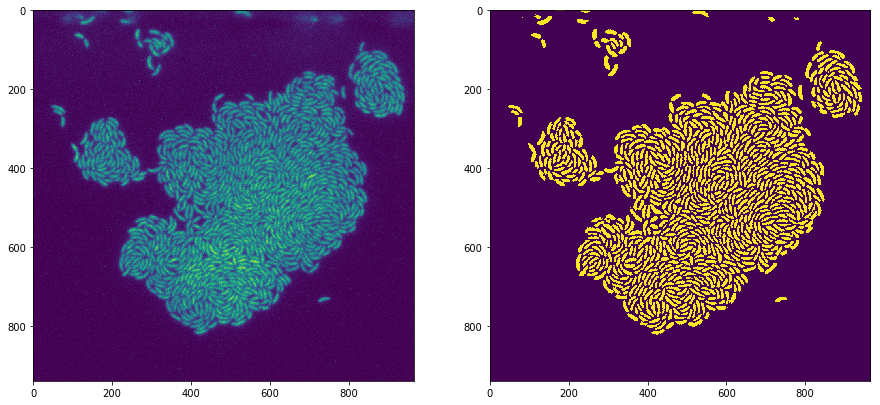

In [26]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(seg)
#plt.colorbar()

# E. coli

In [32]:
img_name = path + 'Ecoli/train/img/micorscope2.tif'
seg_name = path + 'Ecoli/train/mask/segmented2.tif'

In [40]:
img = io.imread(img_name, as_gray = True)
seg = io.imread(seg_name)

In [44]:
new_img = ((img - img.min()) / (img.max() - img.min()))

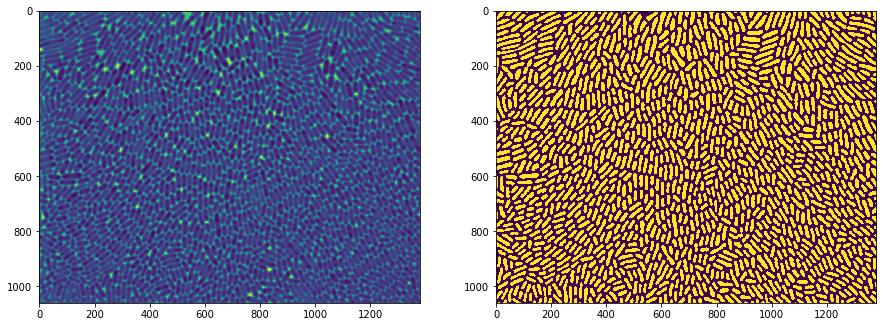

In [45]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.imshow(new_img)

plt.subplot(1,2,2)
plt.imshow(seg)
#plt.colorbar()

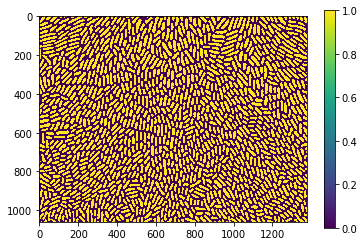